In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Now that the EDA for the data has been completed, it is finally time for model building and evaluation. 

In [66]:
df=pd.read_csv("data/main.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,self_employed,work_interfere,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,Often,37,Female,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,Rarely,44,Male,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,Rarely,32,Male,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,No,Often,31,Male,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,Never,31,Male,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,No,Unknown,26,Male,No,Yes,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1250,No,Often,32,Male,Yes,Yes,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1251,No,Sometimes,34,Male,Yes,Yes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1252,No,Unknown,46,Female,No,No,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


We should proceed with the split of data- features and labels.

* Our target variable is the `treatment` column, which we need to see how likely it is for a respondent to seek treatment given the other factors
* So, we should make X and y, corresponding to feature and target variables

In [67]:
X=df.drop("treatment", axis=1)
y=df["treatment"]

Now that we have our data, we will proceed with dividing it further into train and test splits.

* Dividing data into train and test is incredibly important, as it helps in model evaluation(how good the model did)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#### Now, we will use a OneHotEncode stratergy, as all of the data in our dataframe is categorical except age, and ML models need numeric inputs to train. Thus, we will use the OneHotEncoder and ColumnTransformer to convert all of our data to numerical

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = [col for col in X.columns if col != "Age"]

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed=transformer.transform(X_test)

X_transformed = transformer.fit_transform(X)  # Full X data, important for cross_val_score

#Remember to use fit_transform() only on the training data, and transform() on the test data

In [70]:
#Now, we have transformed data that we can directly fit into our models 
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,42.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,43.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31.0
999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0
1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,23.0
1001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,25.0


In [71]:
#Let's also transform our 'y' data, as they are in 'Yes' and 'No' formats right now
#Remember, ColumnTransformer is for a dataframe with multiple columns and cannot be used on a series, and a LabelEncoder is better for such tasks
from sklearn.preprocessing import LabelEncoder

label_encode=LabelEncoder()

y_train_transformed=label_encode.fit_transform(y_train)
y_test_transformed=label_encode.transform(y_test)

y_transformed = label_encode.fit_transform(y)  # Full y data, important for cross_val_score

#### We will use 3 models and compare their accuracy, and then use the model that gives us the best results. 

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf1=RandomForestClassifier()
clf2=LogisticRegression(max_iter=1000)
clf3=KNeighborsClassifier()

model_list=[clf1, clf2, clf3]
from sklearn.metrics import accuracy_score
for model in model_list:
    model.fit(X_train_transformed, y_train_transformed)
    y_preds=model.predict(X_test_transformed)
    print(f"The score achieved by the {model} model is {accuracy_score(y_test_transformed, y_preds)}")

The score achieved by the RandomForestClassifier() model is 0.8167330677290837
The score achieved by the LogisticRegression(max_iter=1000) model is 0.8247011952191236
The score achieved by the KNeighborsClassifier() model is 0.6613545816733067


### Lets perform cross validation on our models to confirm the accuracy. Cross validation takes different sections of the data and trains on it, and gives scores corresponding to each split of data. 

In [77]:
from sklearn.model_selection import cross_val_score
for model in model_list:
    print(f"The cross validation score for model {model} are {cross_val_score(model, X_transformed, y_transformed)}")

The cross validation score for model RandomForestClassifier() are [0.83266932 0.83266932 0.82071713 0.84063745 0.784     ]
The cross validation score for model LogisticRegression(max_iter=1000) are [0.81673307 0.8247012  0.84462151 0.85657371 0.772     ]
The cross validation score for model KNeighborsClassifier() are [0.6812749  0.71713147 0.64940239 0.72111554 0.648     ]


### Now that we have the cross validation scores, we can see that the Logistic Regression and RandomForestClassifier models out-perform the KNeighbors model

### Now, we proceed towards making a confusion matrix for each of these models, so we can understand the relationship between their true positive, true negatives, false positives and false negatives

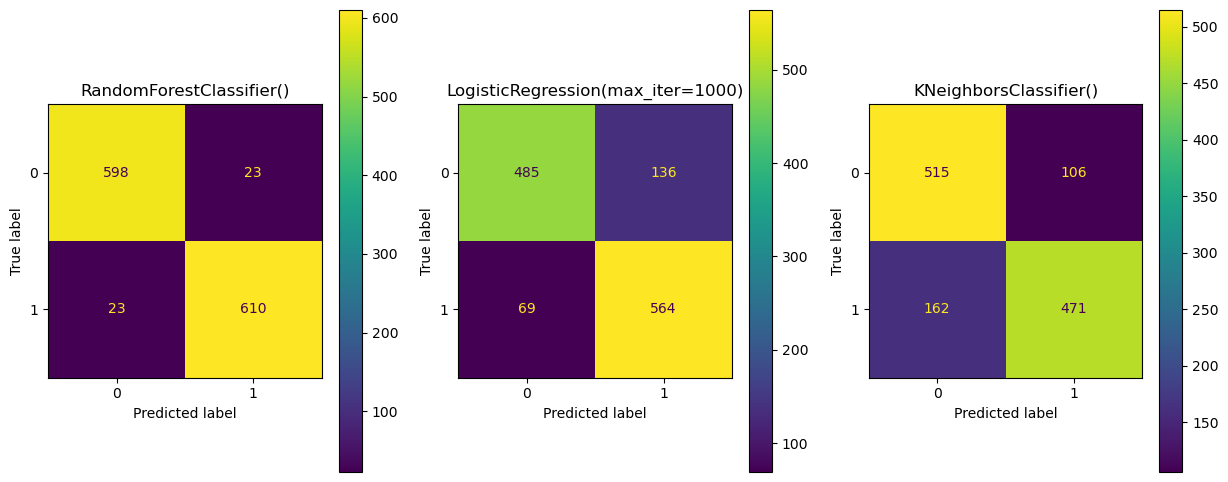

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes=plt.subplots(1,len(model_list),figsize=(15,6))
i=0
for model in model_list:
    ConfusionMatrixDisplay.from_estimator(model, X_transformed, y_transformed, ax=axes[i])
    axes[i].set(title=f"{model}")
    i=i+1

### Looking at the confusion matrix, its obvious that RandomForestClassifier has a higher cound of true positives and true negatives compared to any of the three other models. Now we will 